In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np

# Define radius and center of circle
r = 1
center = (0, 0)

# Define angle range for circle
theta = np.linspace(0, 2*np.pi, 20)

# Generate coordinates for points on circle
x = center[0] + r*np.cos(theta)
y = center[1] + r*np.sin(theta)

# Combine x and y into a single array
data = np.stack((x, y), axis=1)

# Assign alternating labels
labels = np.ones(20)
labels[1::2] = 0
labels=np.asarray([float(i) for i in labels])
print("Data:\n", data)
print("Labels:\n", labels)


In [ ]:
type(labels[0])

numpy.int64

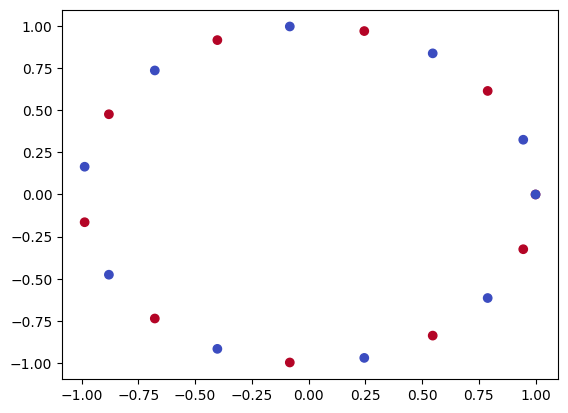

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data with different colors for each label
plt.scatter(data[:,0], data[:,1], c=labels, cmap='coolwarm')
plt.show()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [5]:
import torch.nn.init as init

In [18]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP,self).__init__()
        # code here
        self.mlp1=nn.Linear(2,1000)
        self.mlp2=nn.Linear(1000,1000)
        self.mlp3=nn.Linear(1000,1)
        self.double()
        init.normal_(self.mlp1.weight, mean=0, std=0.1)
        init.kaiming_uniform_(self.mlp2.weight, nonlinearity='relu')
        init.kaiming_uniform_(self.mlp3.weight, nonlinearity='relu')
        init.constant_(self.mlp1.bias, 0)
        init.constant_(self.mlp2.bias, 0)
        init.constant_(self.mlp3.bias, 0)
    def forward(self,x):
        # code here
        output=torch.relu(self.mlp1(x))
        output=torch.relu(self.mlp2(output))
        output=self.mlp3(output)
        return output
model=SimpleMLP().to(device)

In [7]:
optim_sgd_moment=torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.5)

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [15]:
dataset = MyDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [19]:
for i in dataloader:
  output=model(i[0])
  print(output.squeeze(dim=0))

tensor([0.0392], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0666], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0275], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0941], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0740], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0281], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0684], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0706], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0352], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0803], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0941], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0384], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0689], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0857], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.0294], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
tensor([0.

In [11]:
batch[0].shape

NameError: ignored

In [21]:
n_epochs=200
epochs=tqdm(range(n_epochs))
training_loss_sgd=[]
for epoch in epochs:
  train_loss=[]
  model.train()
  for batch in dataloader:
    optim_sgd_moment.zero_grad()
    images=batch[0].to(device)
    label=batch[1].to(device)
    output=model(images)
    #print(output.dtype)
    loss=nn.BCELoss()(output.squeeze(dim=0),label)
    loss.backward()
    optim_sgd_moment.step()
    train_loss.append(loss.item())
  loss_now=np.mean(train_loss)
  training_loss_sgd.append(loss_now)
  epochs.set_postfix({'loss':loss_now}) 

100%|██████████| 200/200 [00:24<00:00,  8.15it/s, loss=1.47]


In [22]:
weights_1 = model.mlp1.weight.data
weights_2 = model.mlp2.weight.data
weights_3 = model.mlp3.weight.data

In [23]:
weights_3.shape

torch.Size([1, 1000])

In [24]:
num_samples = 40

In [92]:
x_recons = torch.randn(num_samples, 2,dtype=torch.float64) #creating random x 
l=torch.rand(num_samples)#creating random lamdas for respective x
opt_x_recons = torch.optim.SGD([x_recons], lr=0.2821179669627431, momentum=0.9) #making it optimising variable
opt_l=torch.optim.SGD([l],lr=0.2821179669627431,momentum=0.9) #making it optimising variable

In [80]:
x_recons.dtype

torch.float64

In [93]:
values=model(x_recons)

In [94]:
values=values.reshape(-1)

In [98]:
x_recons


tensor([[-1.2235,  1.7353],
        [ 2.5764,  0.2107],
        [-0.4414, -1.2741],
        [-0.4566,  0.1752],
        [ 2.3700, -0.0648],
        [ 1.2658,  1.0316],
        [-1.5327,  0.4300],
        [-0.6561, -1.9102],
        [-0.5036, -0.3179],
        [ 0.3324, -0.2464],
        [ 2.0652,  0.5362],
        [-1.0435, -0.0232],
        [-0.8429,  0.1352],
        [ 0.7699,  1.5022],
        [-1.8188,  0.5215],
        [-0.3799,  1.3657],
        [ 0.4972,  0.8493],
        [ 0.6745,  0.9361],
        [ 1.0915,  0.8107],
        [ 0.3614,  0.2835],
        [-0.6915,  1.3357],
        [-0.3250, -0.2189],
        [-0.3023,  0.7911],
        [ 1.4106,  0.1184],
        [-0.1056,  0.7047],
        [-0.9952,  0.6153],
        [ 1.1083, -1.1610],
        [-0.4932, -0.0900],
        [-0.3884,  0.3270],
        [ 0.1550,  1.9085],
        [-0.7317, -0.3383],
        [-0.3800,  0.9118],
        [ 0.0822,  0.1019],
        [ 1.2801,  0.3030],
        [-1.2882,  0.6467],
        [ 0.4412,  0

In [95]:
print(l.shape,y.shape,values.shape)

torch.Size([40]) torch.Size([40]) torch.Size([40])


In [96]:
l

tensor([0.3163, 0.7050, 0.7809, 0.4065, 0.1297, 0.1897, 0.6174, 0.9572, 0.4884,
        0.2616, 0.9923, 0.6754, 0.9847, 0.8273, 0.3466, 0.6942, 0.3303, 0.4535,
        0.8913, 0.1964, 0.0693, 0.8075, 0.0861, 0.6302, 0.6802, 0.1999, 0.3245,
        0.3988, 0.8052, 0.9325, 0.8161, 0.4101, 0.0609, 0.9995, 0.4087, 0.9831,
        0.1271, 0.0170, 0.1142, 0.5008])

In [97]:
l.dim()

1

In [99]:
y = torch.zeros(40)
y[:20] = 1

In [88]:
def get_kkt_loss(values, l, y, model):
    l = l.squeeze()
    # all three shape should be (n)
    assert values.dim() == 1
    assert l.dim() == 1
    assert y.dim() == 1
    assert values.shape == l.shape == y.shape

    output = values * l * y
    grad = torch.autograd.grad(
        outputs=output,
        inputs=model.parameters(),
        grad_outputs=torch.ones_like(output, requires_grad=False, device=output.device).div(500),
        create_graph=True,
        retain_graph=True,
    )
    kkt_loss = 0

    for i, (p, grad) in enumerate(zip(model.parameters(), grad)):
        assert p.shape == grad.shape
        l = (p.detach().data - grad).pow(2).sum()
        kkt_loss += l
    return kkt_loss

In [64]:
kkt_loss=get_kkt_loss(values,l,y,model)

In [65]:
kkt_loss

tensor(2857.9128, dtype=torch.float64, grad_fn=<AddBackward0>)

In [68]:
def get_verify_loss(x, l):
    loss_verify = 0
    loss_verify += 1 * (x - 1).relu().pow(2).sum()
    loss_verify += 1 * (-1 - x).relu().pow(2).sum()
    loss_verify += 5 * (-l + 0.4983026413803425).relu().pow(2).sum()
    return loss_verify

In [69]:
loss_verify=get_verify_loss(x_recons,l)

In [ ]:
for epoch in range(50000):
        values = model(x_recons).squeeze()
        kkt_loss, loss_verify =get_kkt_loss(values,l,y,model),get_verify_loss(x_recons,l)
        loss=kkt_loss+loss_verify
        if np.isnan(kkt_loss.item()):
            raise ValueError('Optimizer diverged during extraction')
        opt_x_recons.zero_grad()
        opt_l.zero_grad()
        loss.backward()
        opt_x_recons.step()
        opt_l.step()
        if(epoch%1000==0):
          print(epoch)
        

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [104]:
opt_x_recons

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [105]:
x_recons

tensor([[-1.2235,  1.7353],
        [ 2.5764,  0.2107],
        [-0.4414, -1.2741],
        [-0.4566,  0.1752],
        [ 2.3700, -0.0648],
        [ 1.2658,  1.0316],
        [-1.5327,  0.4300],
        [-0.6561, -1.9102],
        [-0.5036, -0.3179],
        [ 0.3324, -0.2464],
        [ 2.0652,  0.5362],
        [-1.0435, -0.0232],
        [-0.8429,  0.1352],
        [ 0.7699,  1.5022],
        [-1.8188,  0.5215],
        [-0.3799,  1.3657],
        [ 0.4972,  0.8493],
        [ 0.6745,  0.9361],
        [ 1.0915,  0.8107],
        [ 0.3614,  0.2835],
        [-0.6915,  1.3357],
        [-0.3250, -0.2189],
        [-0.3023,  0.7911],
        [ 1.4106,  0.1184],
        [-0.1056,  0.7047],
        [-0.9952,  0.6153],
        [ 1.1083, -1.1610],
        [-0.4932, -0.0900],
        [-0.3884,  0.3270],
        [ 0.1550,  1.9085],
        [-0.7317, -0.3383],
        [-0.3800,  0.9118],
        [ 0.0822,  0.1019],
        [ 1.2801,  0.3030],
        [-1.2882,  0.6467],
        [ 0.4412,  0

In [78]:
x_recons

tensor([[ 0.9349, -0.2258],
        [ 0.7236,  0.5235],
        [ 1.4883, -0.4232],
        [-0.5597, -0.7137],
        [-1.2163,  0.3108],
        [-2.3479,  2.9770],
        [ 0.6831,  0.3837],
        [ 0.4717,  1.3589],
        [-0.9975, -1.1045],
        [ 1.7470, -0.6006],
        [ 0.5297,  1.0011],
        [ 1.8379, -0.9137],
        [-0.9489, -0.2634],
        [-1.3420, -0.9547],
        [-1.4123,  1.0511],
        [-0.0553,  0.0442],
        [ 1.1021,  0.3099],
        [ 1.2995,  1.4130],
        [-0.1705, -1.1931],
        [ 1.0287,  0.4594],
        [-2.2019, -0.6327],
        [ 0.5933,  0.5412],
        [-0.4828, -0.6670],
        [ 0.8715, -0.6389],
        [-0.1098,  0.2994],
        [-0.9005,  1.2799],
        [ 0.3943,  0.3888],
        [-0.6987, -1.1442],
        [ 1.4850,  0.0946],
        [-1.5756,  0.0338],
        [-1.1539,  1.7210],
        [ 1.1723,  1.8227],
        [ 0.5292, -0.7571],
        [ 0.2316, -0.3765],
        [ 1.7573,  0.5804],
        [-0.2884, -0

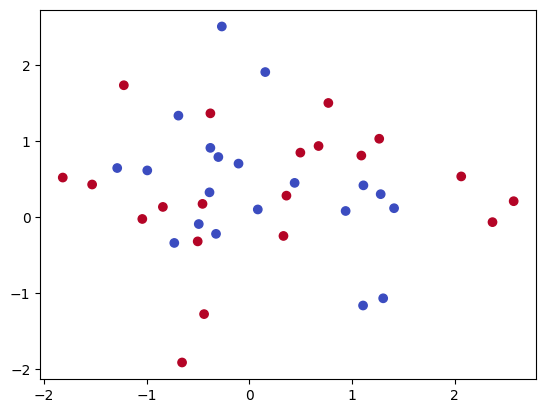

In [106]:
plt.scatter(x_recons[:,0], x_recons[:,1], c=y, cmap='coolwarm')
plt.show()

In [107]:
l

tensor([0.3163, 0.7050, 0.7809, 0.4065, 0.1297, 0.1897, 0.6174, 0.9572, 0.4884,
        0.2616, 0.9923, 0.6754, 0.9847, 0.8273, 0.3466, 0.6942, 0.3303, 0.4535,
        0.8913, 0.1964, 0.0693, 0.8075, 0.0861, 0.6302, 0.6802, 0.1999, 0.3245,
        0.3988, 0.8052, 0.9325, 0.8161, 0.4101, 0.0609, 0.9995, 0.4087, 0.9831,
        0.1271, 0.0170, 0.1142, 0.5008])